In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

# Load Data

In [6]:
data = loadmat('ADA4-digit.mat')
train = data['X']
test = data['T']

print("Train data: {}".format(train.shape))
print("Test data:  {}".format(test.shape))

Train data: (256, 500, 10)
Test data:  (256, 200, 10)


# Multi-classifier

In [7]:

mu1 = []
mu2 = []
invS = []

# store mean and variances for each class
for i in range(10):

    train_one = train[:, :, i]
    train_all = np.delete(train,i,axis=2).reshape(256,-1,order="A")

    # Make a classifier for one and all
    mu1.append(np.mean(train_one, axis=1))
    mu2.append(np.mean(train_all, axis=1))
    S = (np.cov(train_one) + np.cov(train_all)) / 2
    invS.append(np.linalg.inv(S + 0.000001 * np.identity(256)))

C = np.zeros((10,10))

# Evaluate test cases using learnt data.
for i in range(10):
    t = test[:, :, i]
    pnet = []
    print(f"Test digit {i+1}")
    for j in range(10):
        p1 = mu1[j][None, :].dot(invS[j]).dot(t) - mu1[j][None, :].dot(invS[j]).dot(mu1[j][:, None]) / 2
        p2 = mu2[j][None, :].dot(invS[j]).dot(t) - mu2[j][None, :].dot(invS[j]).dot(mu2[j][:, None]) / 2
        pnet.append((p1-p2)[0])

    pnet = np.dstack(pnet)[0]
    # Select class having highest p1-p2.
    result = np.argmax(pnet, axis=1)

    for d in result: C[i,d]+=1
    print(f"The number of correct prediction: Digit - {i+1} : {np.sum(result == i)}")
    print(f"The number of false prediction: not Digit - {i+1}: {np.sum(result != i)}")

print("One vs All Prediction")
print(C)
acc = np.trace(C)*100/(test.shape[1]*test.shape[2])
print(f"Accuracy is:{acc}%")


Test digit 1
The number of correct prediction: Digit - 1 : 199
The number of false prediction: not Digit - 1: 1
Test digit 2
The number of correct prediction: Digit - 2 : 171
The number of false prediction: not Digit - 2: 29
Test digit 3
The number of correct prediction: Digit - 3 : 186
The number of false prediction: not Digit - 3: 14
Test digit 4
The number of correct prediction: Digit - 4 : 181
The number of false prediction: not Digit - 4: 19
Test digit 5
The number of correct prediction: Digit - 5 : 164
The number of false prediction: not Digit - 5: 36
Test digit 6
The number of correct prediction: Digit - 6 : 184
The number of false prediction: not Digit - 6: 16
Test digit 7
The number of correct prediction: Digit - 7 : 184
The number of false prediction: not Digit - 7: 16
Test digit 8
The number of correct prediction: Digit - 8 : 164
The number of false prediction: not Digit - 8: 36
Test digit 9
The number of correct prediction: Digit - 9 : 177
The number of false prediction: no

# Plots

[Text(0, 0.5, '1'),
 Text(0, 1.5, '2'),
 Text(0, 2.5, '3'),
 Text(0, 3.5, '4'),
 Text(0, 4.5, '5'),
 Text(0, 5.5, '6'),
 Text(0, 6.5, '7'),
 Text(0, 7.5, '8'),
 Text(0, 8.5, '9'),
 Text(0, 9.5, '0')]

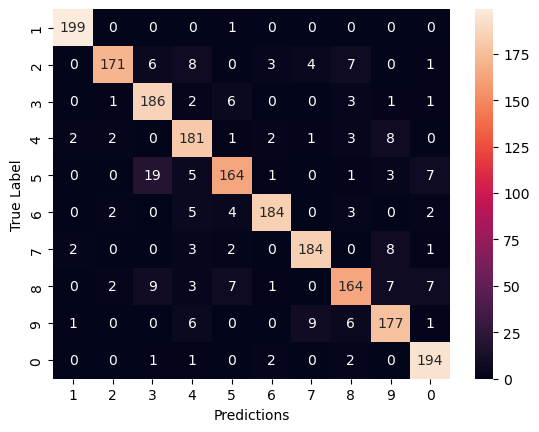

In [8]:

import seaborn as sns
col = [i for i in range(1,10)] + [0]
ax = sns.heatmap(C, annot=True,fmt=".0f")
ax.set(xlabel="Predictions", ylabel="True Label")
ax.set_xticklabels(col)
ax.set_yticklabels(col)